# Amazone크롤러로 가져온 리뷰를 텍스트 분석, 시각화

In [21]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random
from wordcloud import WordCloud, STOPWORDS
from collections import Counter


In [22]:
import nltk
from nltk import pos_tag

In [23]:
import pickle

In [24]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
with open("amazon_review_data.pkl", "rb") as f: data = pickle.load(f)

In [26]:
data

{'평점': ['5.0',
  '3.0',
  '3.0',
  '5.0',
  '3.0',
  '5.0',
  '5.0',
  '5.0',
  '1.0',
  '5.0',
  '3.0',
  '1.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '3.0',
  '5.0',
  '1.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '1.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '4.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '1.0',
  '1.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '2.0',
  '5.0',
  '5.0',
  '5.0',
  '3.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '1.0',
  '5.0',
  '5.0',
  '5.0',
  '2.0',
  '5.0',
  '5.0',
  '4.0',
  '5.0',
  '4.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '2.0',
  '2.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '4.0',
  '4.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '3.0',
  '5.0',
  '5.0'],
 '리

In [33]:
stopwords = nltk.corpus.stopwords.words("english")

In [36]:
stopwords = stopwords + ['’']

In [28]:
def delet_word_eglish(string):
    result_words=[]
    split_text = nltk.word_tokenize(string)
    result = nltk.pos_tag(split_text)
    for word, tag in result:
        if tag in["VB", "VBD", "VBG", "VBN", "VBZ", "VBP",
                  "JJ", "JJR", "JJS", "NN", "NNS", "NNP", "NNPS"]:
            if word.lower() not in stopwords:
                result_words.append(word)
                
    return result_words

In [37]:
review = ""
for i in range(len(data)):
    review =  data['리뷰'][i]
     

In [38]:
final = delet_word_eglish(review)
count = Counter(final)
print(count.most_common(30))

[('face', 3), ('scent', 2), ('light', 1), ('weighted', 1), ('moisturize', 1), ('May', 1), ('add', 1), ('serum', 1), ('products', 1), ('feel', 1), ('dry', 1), ('minutes', 1), ('strong', 1), ('goes', 1), ('prefer', 1), ('use', 1), ('facial', 1), ('rest', 1), ('nose', 1), ('peel', 1), ('afterwards', 1), ('rinse', 1), ('layer', 1), ('something', 1), ('moisturizing', 1), ('top', 1)]


In [39]:
wordcloud = WordCloud(font_path = r"C:\Windows\Fonts\batang.ttc", 
                      width = 700, 
                      height = 700, 
                      background_color = 'black', 
                      colormap = 'spring',
                      random_state = 1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

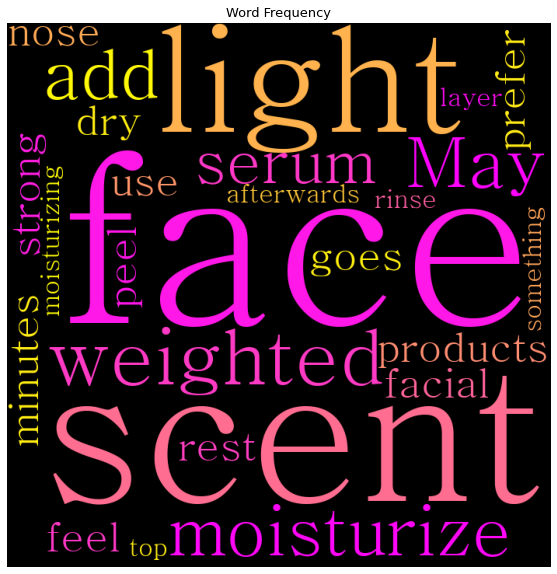

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size = 13)
plt.show